In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
data=pd.read_csv(r"/content/Nigeria.csv")
print(data)

    Year  Number of Cases  Number of Deaths
0   2000         50779020            249259
1   2001         51229713            242479
2   2002         50952482            230464
3   2003         52423482            226442
4   2004         55028747            226548
5   2005         57411916            230350
6   2006         59418382            232391
7   2007         61400329            229178
8   2008         63355538            221435
9   2009         63192869            210275
10  2010         60551056            197612
11  2011         58184509            184121
12  2012         55718235            173344
13  2013         53921321            168943
14  2014         53483458            165188
15  2015         54115123            163088
16  2016         55667334            165672
17  2017         57869533            176539
18  2018         59652248            186940
19  2019         61379283            187428
20  2020         65133759            195720
21  2021         65399501       

In [5]:
data.set_index('Year', inplace=True)

In [6]:
print(data)

      Number of Cases  Number of Deaths
Year                                   
2000         50779020            249259
2001         51229713            242479
2002         50952482            230464
2003         52423482            226442
2004         55028747            226548
2005         57411916            230350
2006         59418382            232391
2007         61400329            229178
2008         63355538            221435
2009         63192869            210275
2010         60551056            197612
2011         58184509            184121
2012         55718235            173344
2013         53921321            168943
2014         53483458            165188
2015         54115123            163088
2016         55667334            165672
2017         57869533            176539
2018         59652248            186940
2019         61379283            187428
2020         65133759            195720
2021         65399501            193512


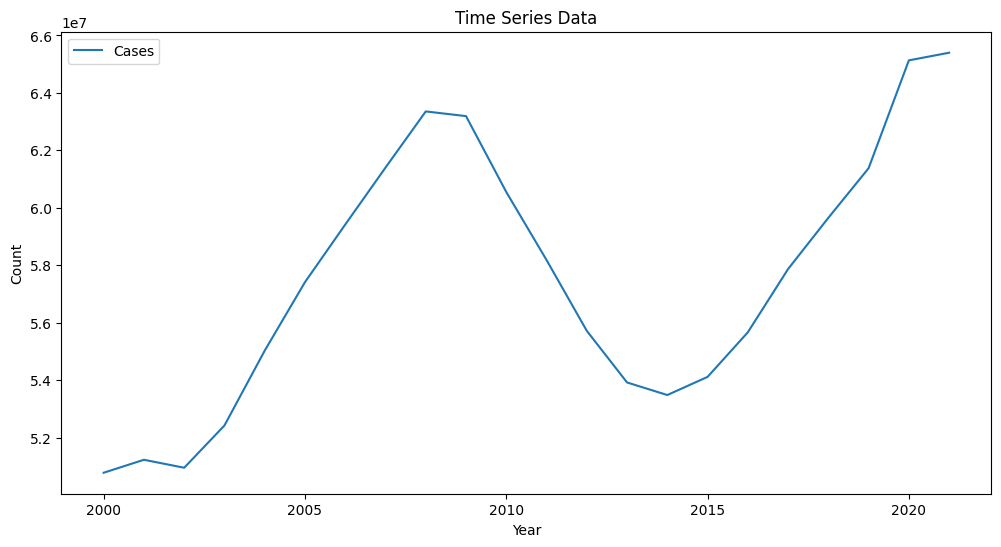

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data['Number of Cases'], label='Cases')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Time Series Data')
plt.legend()
plt.show()

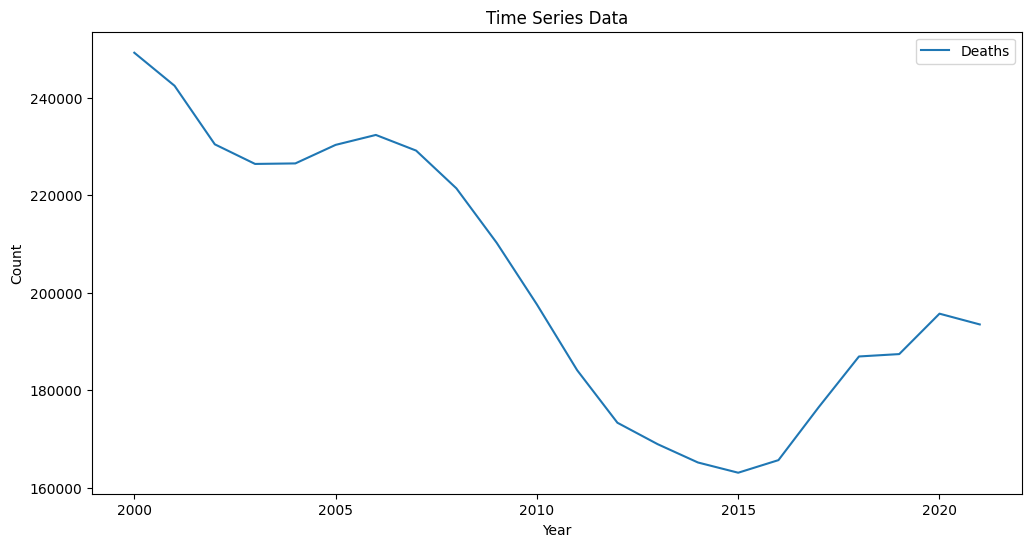

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data['Number of Deaths'], label='Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Time Series Data')
plt.legend()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(12,6))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

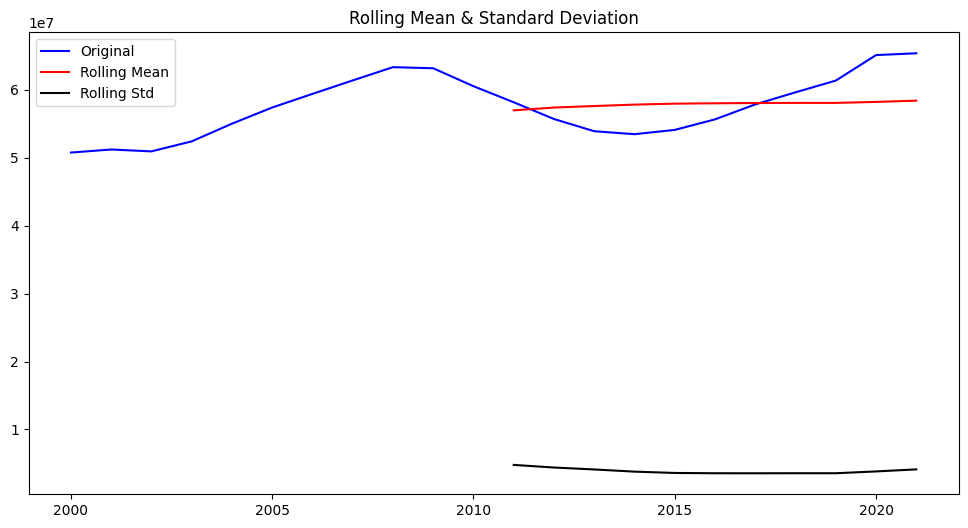

Results of Dickey-Fuller Test:
Test Statistic                 -3.431325
p-value                         0.009936
#Lags Used                      3.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [10]:
test_stationarity(data.iloc[:,0])

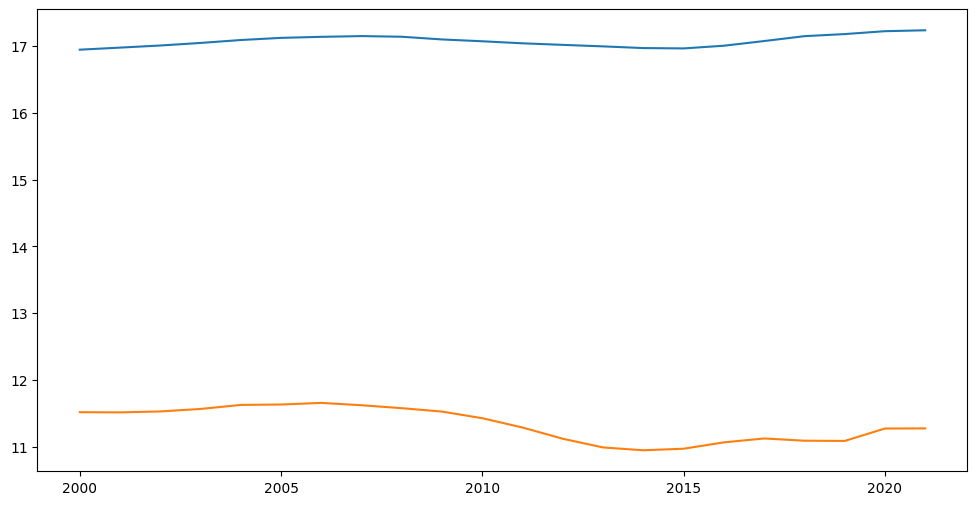

In [ ]:
ts_log=np.log(data)
plt.figure(figsize=(12,6))
plt.plot(ts_log)

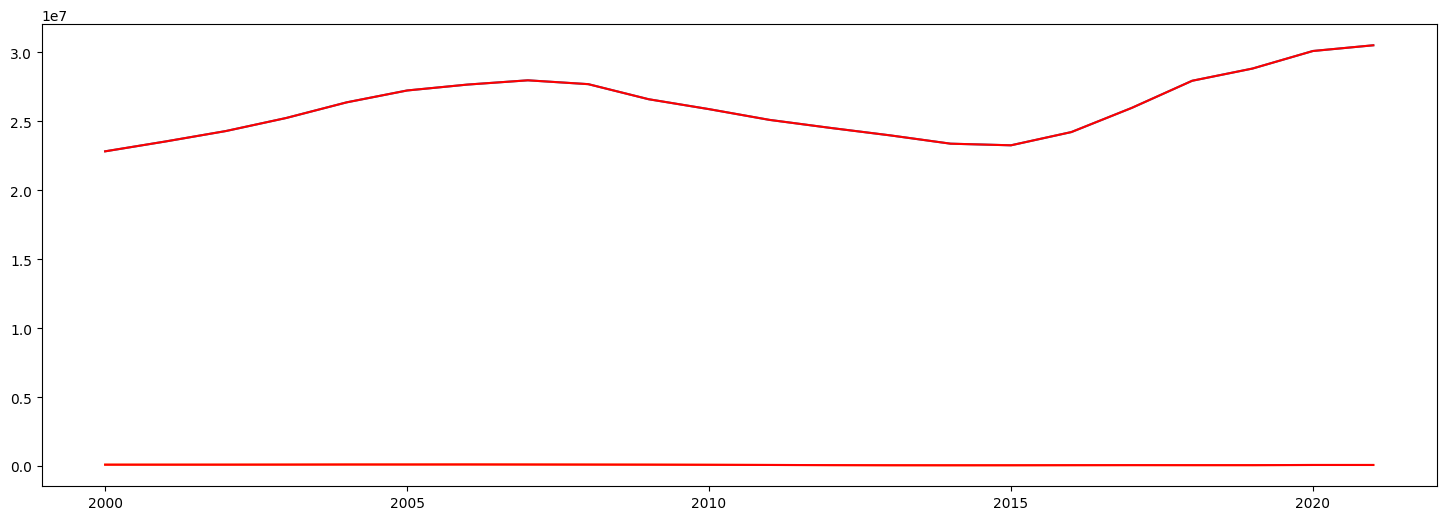

In [ ]:
moving_avg=data.rolling(1).mean()
plt.figure(figsize=(18,6))
plt.plot(data)
plt.plot(moving_avg,color="red")

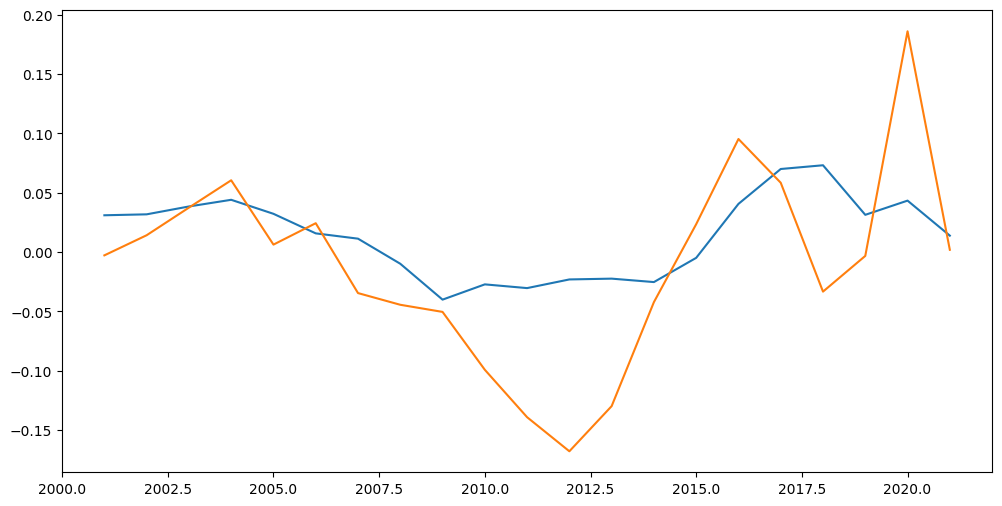

In [ ]:
ts_log_diff= ts_log - ts_log.shift()
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)

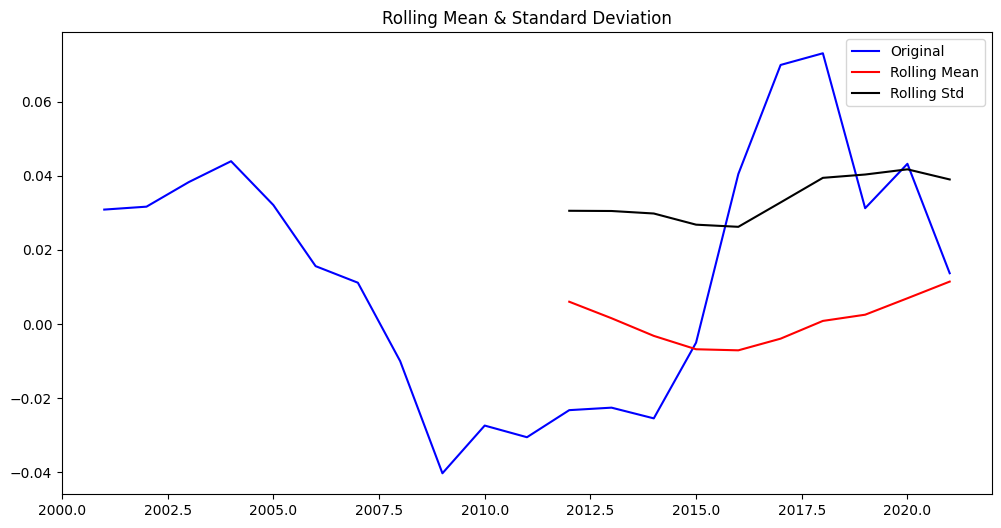

Results of Dickey-Fuller Test:
Test Statistic                 -2.643658
p-value                         0.084306
#Lags Used                      8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff.iloc[:,0])

# Seasonal Decomposition

<Figure size 1600x800 with 0 Axes>

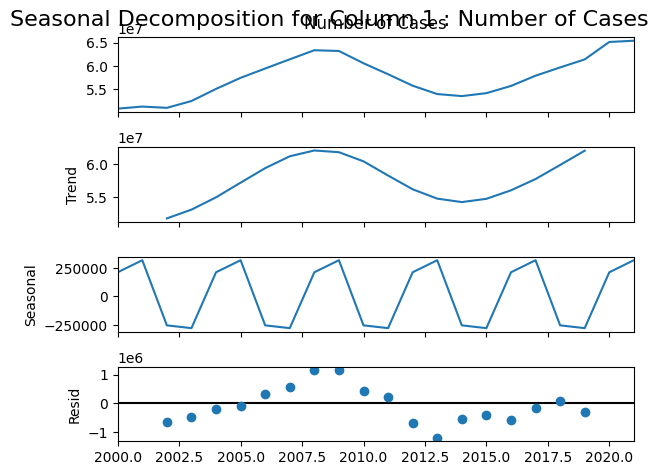

<Figure size 1600x800 with 0 Axes>

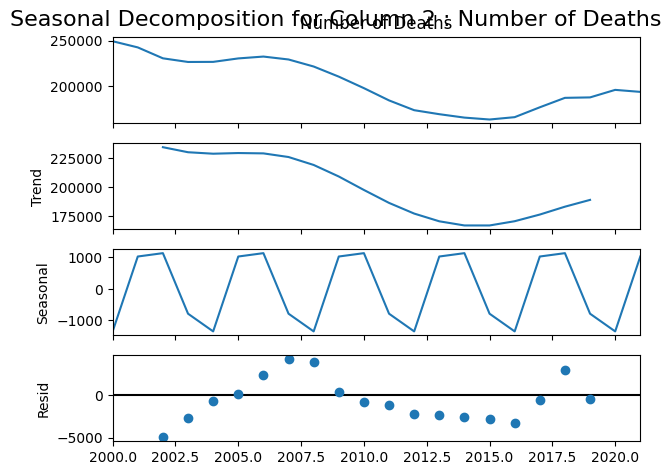

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition1 = seasonal_decompose(data["Number of Cases"],model="additive",period=4)
decomposition2 = seasonal_decompose(data["Number of Deaths"],model="additive",period=4)
plt.figure(figsize=(16,8))
decomposition1.plot()
plt.suptitle("Seasonal Decomposition for Column 1 : Number of Cases",fontsize=16)
plt.figure(figsize=(16,8))
decomposition2.plot()
plt.suptitle("Seasonal Decomposition for Column 2 : Number of Deaths",fontsize=16)
plt.show()

# ACF and PACF

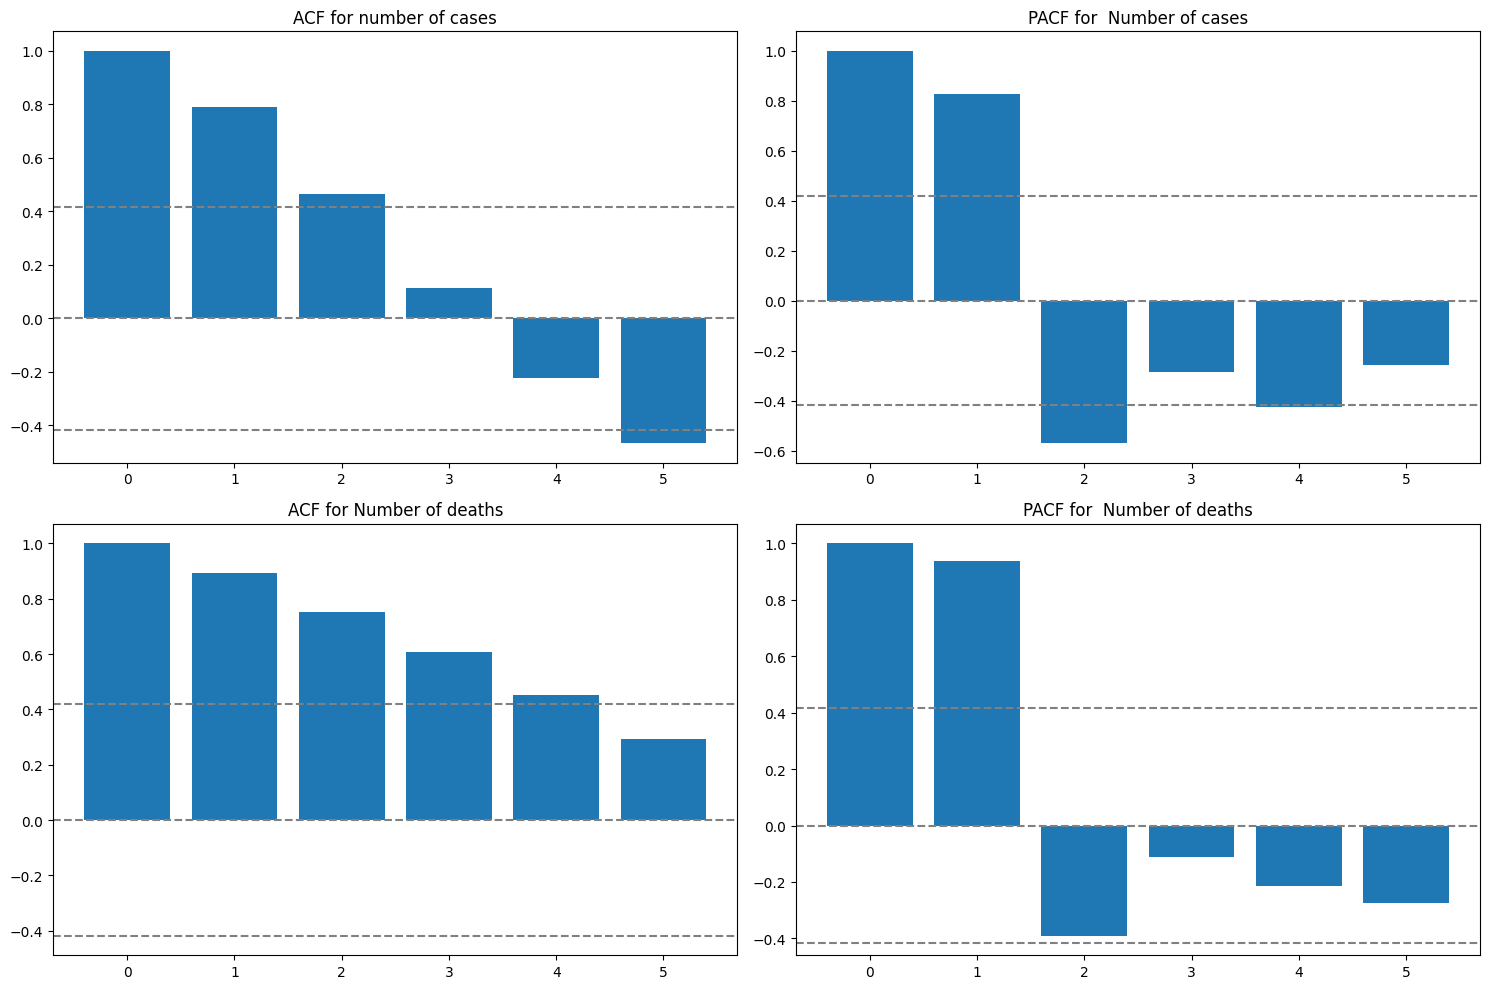

In [12]:
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
nlags=5
#perform PACF and ACF on 1 columns
lag_acf1=acf(data["Number of Cases"], nlags=nlags)
lag_pacf1=pacf(data["Number of Cases"], nlags=nlags)
#perform PACF and ACF on 2 columns
lag_acf2=acf(data["Number of Deaths"], nlags=nlags)
lag_pacf2=pacf(data["Number of Deaths"], nlags=nlags)

plt.figure(figsize=(15,10))

# plot acf for column 1
plt.subplot(221)
plt.bar(np.arange(nlags+1),lag_acf1)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data["Number of Cases"])),linestyle="--",color="gray")
plt.axhline(y=1.96 / np.sqrt(len(data['Number of Cases'])), linestyle='--', color='gray')
plt.title("ACF for number of cases")

 # plot pacf for column 1
plt.subplot(222)
plt.bar(np.arange(nlags+1),lag_pacf1)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data["Number of Cases"])),linestyle="--",color="gray")
plt.axhline(y=1.96 / np.sqrt(len(data['Number of Cases'])), linestyle='--', color='gray')
plt.title("PACF for  Number of cases")

# plot acf for column 2
plt.subplot(223)
plt.bar(np.arange(nlags+1),lag_acf2)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data["Number of Deaths"])),linestyle="--",color="gray")
plt.axhline(y=1.96 / np.sqrt(len(data['Number of Deaths'])), linestyle='--', color='gray')
plt.title("ACF for Number of deaths")

 # plot pacf for column 1
plt.subplot(224)
plt.bar(np.arange(nlags+1),lag_pacf2)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(data["Number of Deaths"])),linestyle="--",color="gray")
plt.axhline(y=1.96 / np.sqrt(len(data['Number of Deaths'])), linestyle='--', color='gray')
plt.title("PACF for  Number of deaths")

plt.tight_layout()
plt.show()

# ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

<function matplotlib.pyplot.show(close=None, block=None)>

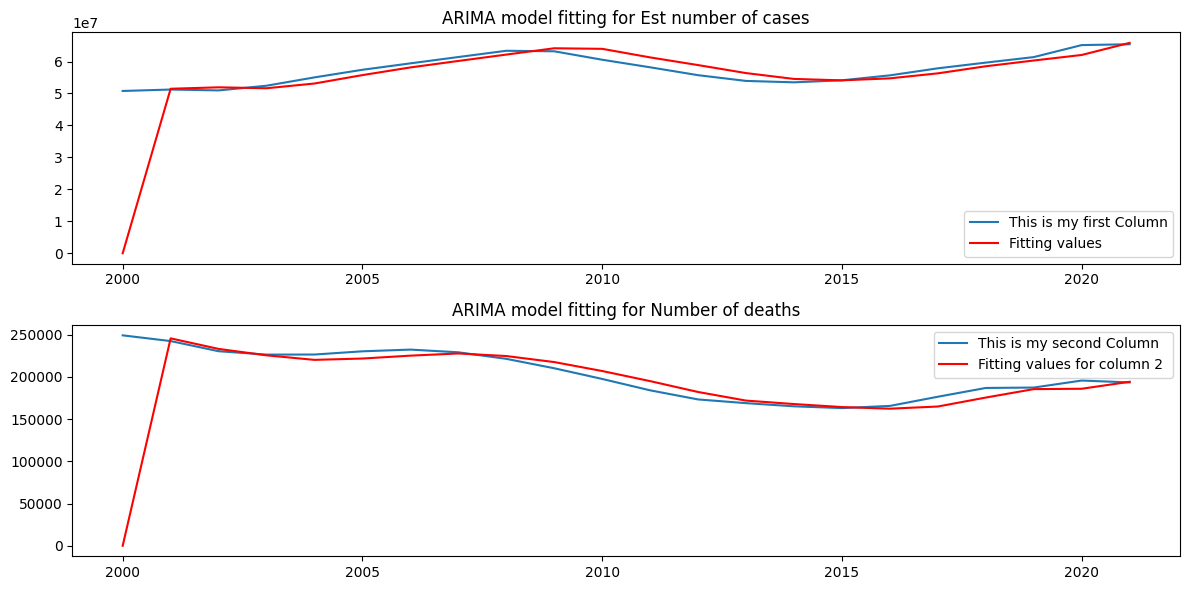

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(data["Number of Cases"],order=(2,1,2))
results_ARIMA1=model1.fit()
model2=ARIMA(data["Number of Deaths"],order=(2,1,2))
results_ARIMA2=model2.fit()
 # plot thing
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(data["Number of Cases"],label="This is my first Column")
plt.plot(results_ARIMA1.fittedvalues,color="red",label="Fitting values")
plt.legend()
plt.title("ARIMA model fitting for Est number of cases")

#plotting for 2 column
plt.subplot(2,1,2)
plt.plot(data["Number of Deaths"],label="This is my second Column")
plt.plot(results_ARIMA2.fittedvalues,color="red",label="Fitting values for column 2 ")
plt.legend()
plt.title("ARIMA model fitting for Number of deaths")

plt.tight_layout()
plt.show

In [14]:
# For making predictions
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
predictions_cases = results_ARIMA1.predict(start=1,end=len(data),typ="levels")
predictions_deaths = results_ARIMA2.predict(start=1,end=len(data),typ="levels")
# for Cases Column
print("Prediction for Number of cases : ")
print(predictions_cases)
# for Death Column
print("Prediction for Number of Deaths : ")
print(predictions_deaths)

Prediction for Number of cases : 
1     5.147488e+07
2     5.192012e+07
3     5.163213e+07
4     5.311144e+07
5     5.574369e+07
6     5.814611e+07
7     6.017077e+07
8     6.216596e+07
9     6.413795e+07
10    6.396161e+07
11    6.128085e+07
12    5.887539e+07
13    5.637410e+07
14    5.454662e+07
15    5.409865e+07
16    5.472842e+07
17    5.629327e+07
18    5.851088e+07
19    6.030820e+07
20    6.204479e+07
21    6.583457e+07
22    6.609349e+07
Name: predicted_mean, dtype: float64
Prediction for Number of Deaths : 
1     245693.320106
2     233195.337362
3     225584.694885
4     220216.046189
5     221801.281589
6     225220.785809
7     227798.419837
8     224740.531339
9     217616.730021
10    207003.534644
11    195031.301177
12    182164.072128
13    171965.054395
14    167880.641950
15    164301.470215
16    162376.947897
17    164958.608374
18    175564.493572
19    185563.965134
20    185993.190086
21    194253.004985
22    191935.258081
Name: predicted_mean, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [15]:
#  Forecasting for next 4 years
n_future_years = 4
prediction_cases= results_ARIMA1.predict(start=len(data),end=len(data)+n_future_years - 1,typ="levels")
prediction_deaths= results_ARIMA2.predict(start=len(data),end=len(data)+n_future_years - 1,typ="levels")
print("Forecasting for Estimated number of cases will be :  ")
print(prediction_cases)
print("Forecasting for Estimated number of deaths will be :  ")
print(prediction_deaths)


Forecasting for Estimated number of cases will be :  
22    6.609349e+07
23    6.678969e+07
24    6.748369e+07
25    6.817988e+07
Name: predicted_mean, dtype: float64
Forecasting for Estimated number of deaths will be :  
22    191935.258081
23    190682.820910
24    189462.448112
25    188413.605877
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
#Predictions for future
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already fitted ARIMA models as per your previous code
# Also, assuming your data is indexed by 'Year'

# Get the most recent year in your data
most_recent_year = data.index.max()

# Define the number of future years you want to predict
n_future_years = 4  # You can adjust this for the desired number of years

# Calculate the starting and ending years for predictions
start_year = most_recent_year + 1
end_year = most_recent_year + n_future_years

# Make predictions for both columns for the future years
predictions_cases = results_ARIMA1.predict(start=start_year, end=end_year, typ='levels')
predictions_deaths = results_ARIMA2.predict(start=start_year, end=end_year, typ='levels')

# Print the forecasting values
print("Forecasted values for Number of cases:")
print(predictions_cases)

print("Forecasted values for Number of deaths:")
print(predictions_deaths)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Forecasted values for Number of cases:
2022    1.456110e+09
2023    1.456806e+09
2024    1.457500e+09
2025    1.458196e+09
Name: predicted_mean, dtype: float64
Forecasted values for Number of deaths:
2022    178704.152511
2023    178704.152511
2024    178704.152511
2025    178704.152511
Name: predicted_mean, dtype: float64


# Should check for Overfitting with Evaluation Metrics like MAE, MSE, RMSE, R-Square and R-Squared

# SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


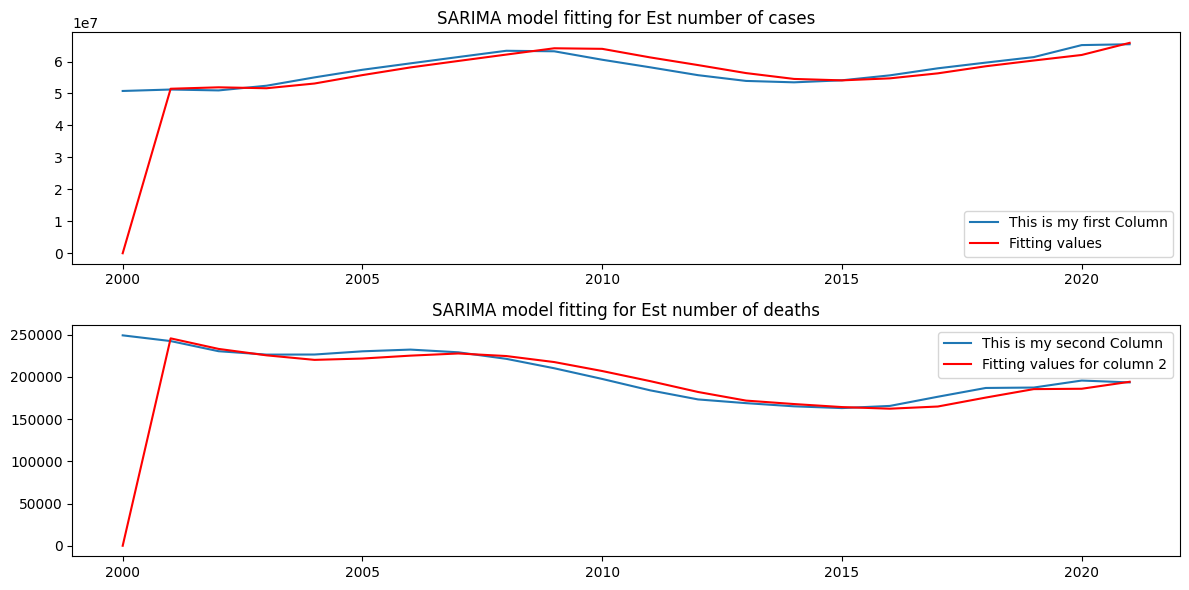

In [17]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define the SARIMA model for the first column (Est number of cases)
order = (2, 1, 2)  # (p, d, q) parameters for the non-seasonal part of SARIMA
seasonal_order = (2, 1, 2,3)  # (P, D, Q, S) parameters for the seasonal part (12 for monthly data)

model3= sm.tsa.SARIMAX(data["Number of Cases"], order=order, seasonal_order=seasonal_order)
results_SARIMA1 = model1.fit()

# Define the SARIMA model for the second column (Est number of deaths)
order = (2, 1, 2)  # (p, d, q) parameters for the non-seasonal part of SARIMA
seasonal_order = (2, 1, 2, 3)  # (P, D, Q, S) parameters for the seasonal part (12 for monthly data)

model4 = sm.tsa.SARIMAX(data["Number of Deaths"], order=order, seasonal_order=seasonal_order)
results_SARIMA2 = model2.fit()

# Plotting for the first column
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data["Number of Cases"], label="This is my first Column")
plt.plot(results_SARIMA1.fittedvalues, color="red", label="Fitting values")
plt.legend()
plt.title("SARIMA model fitting for Est number of cases")

# Plotting for the second column
plt.subplot(2, 1, 2)
plt.plot(data["Number of Deaths"], label="This is my second Column")
plt.plot(results_SARIMA2.fittedvalues, color="red", label="Fitting values for column 2")
plt.legend()
plt.title("SARIMA model fitting for Est number of deaths")

plt.tight_layout()
plt.show()


In [18]:

n_future_years = 4
prediction_cases5= results_SARIMA1.predict(start=len(data),end=len(data)+n_future_years - 1,typ="levels")
prediction_deaths6= results_SARIMA2.predict(start=len(data),end=len(data)+n_future_years - 1,typ="levels")
print("Forecasting for Estimated number of cases will be :  ")
print(prediction_cases5)
print("Forecasting for Estimated number of deaths will be :  ")
print(prediction_deaths6)

Forecasting for Estimated number of cases will be :  
22    6.609349e+07
23    6.678969e+07
24    6.748369e+07
25    6.817988e+07
Name: predicted_mean, dtype: float64
Forecasting for Estimated number of deaths will be :  
22    191935.258081
23    190682.820910
24    189462.448112
25    188413.605877
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Should check for Overfitting with Evaluation Metrics like MAE, MSE, RMSE, R-Square and R-Squared